In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data into a DataFrame
data = pd.read_csv('FilteredData_MorrisLecar_I0_80.csv')

# Remove rows with missing values (NaN)
data = data.dropna()

# Separate input predictors (exclude 'p1' and 'p3') and output response 'lnextmax'
input_predictors = data[['Amp', 'L', 'L1', 'L2', 'p2']].values
output_response = data[[ 'tnextmax']].values

In [3]:
# Create the linear regression model
# linear_reg_model = LinearRegression()
# Create the SVM regression model with a linear kernel
# svm_model = SVR(kernel='linear')
from sklearn.svm import LinearSVR
svm_model = LinearSVR(max_iter=10000)

In [4]:
# Perform k-fold cross-validation with k=5
kf = KFold(n_splits=5, shuffle=True, random_state=42) # cv=5 also works, but this line helps to customize. eg: set seed (random_state = 42)
cv_scores = cross_val_score(svm_model, input_predictors, output_response, cv=kf, scoring='r2',n_jobs=-1) # scoring = r2 means using r^2 to measure performance

In [5]:
# Print the R-squared scores from cross-validation
print("R-squared scores from cross-validation:", cv_scores)
print("Average R-squared score:", cv_scores.mean())

R-squared scores from cross-validation: [0.95058779 0.95063672 0.94677623 0.94966106 0.94999464]
Average R-squared score: 0.949531286394149


In [7]:
# It is not necessary to do the split as I have done cross validation
# Doing it for future because I might add a bigger data set, so can easily copy and paste this part 
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(input_predictors, output_response, test_size=0.2, random_state=42)

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)


C:\Users\Lawan Wijayasooriya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lawan Wijayasooriya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
# Evaluate the model's performance using mean squared error and R-squared
# mse = mean_squared_error(output_response, y_pred)
#r2 = r2_score(output_response, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"Mean Squared Error: {mse:.2f}")
#print(f"R-squared: {r2:.2f}")

Mean Squared Error: 37.06


In [9]:
output_range = (data['l3max'].min(), data['l3max'].max())

print("Output variable range:", output_range)

Output variable range: (77.4, 189.4)


C:\Users\Lawan Wijayasooriya\AppData\Local\Temp\ipykernel_4048\2044510865.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(output_response, bins=30, kde=True, color='blue', label='Mechanistic Model')
C:\Users\Lawan Wijayasooriya\AppData\Local\Temp\ipykernel_4048\2044510865.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

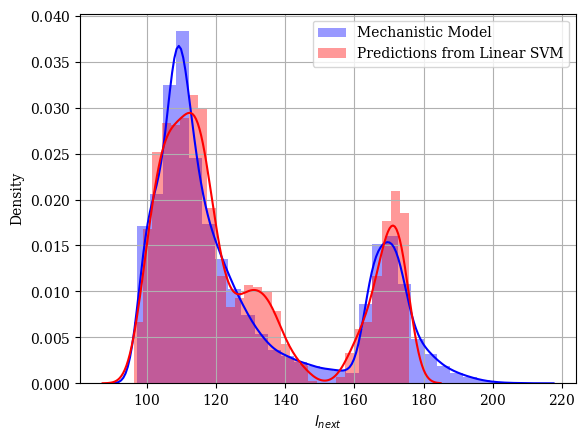

In [10]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False
mpl.rcParams['font.family'] = 'serif'
# mpl.rcParams['font.serif'] = ['Computer Modern Roman']
mpl.rcParams['axes.formatter.use_mathtext'] = True  # Formats tick numbers in math mode


# Create histograms with KDE (Kernel Density Estimation) curves for the predicted values and test data
sns.distplot(output_response, bins=30, kde=True, color='blue', label='Mechanistic Model')
sns.distplot(y_pred, bins=30, kde=True, color='red', label='Predictions from Linear SVM')
plt.xlabel(r'$l_{next}$')
plt.ylabel('Density')
# plt.title('Distribution of Actual Data and Predicted Values - Linear Regression Model')
plt.legend()
plt.grid(True)
plt.savefig('linear_SVM.png', dpi=300, bbox_inches='tight')

plt.show()



In [11]:
plt.savefig('LinRig_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


<Figure size 640x480 with 0 Axes>